In [20]:
import numpy as np
import cv2  
import matplotlib.pyplot as plt

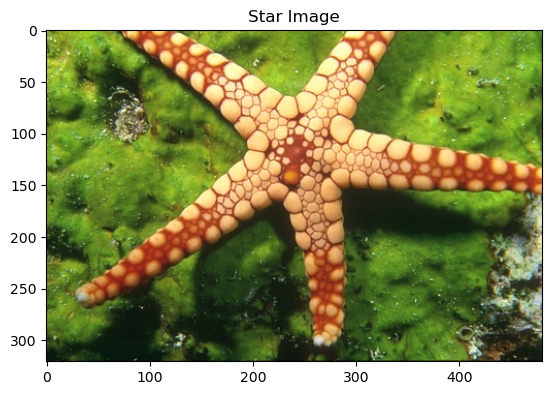

(321, 481, 3)

In [35]:
img_path = 'star.jpg'
img = cv2.imread(img_path, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.title('Star Image')
plt.imshow(img)
plt.show()
img.shape

## Colorwise Kmeans 

In [36]:
def kmeans(k, data):
    centers = data[np.random.choice(data.shape[0], k, replace=False)]
    while True:
        labels = np.argmin(np.linalg.norm(data[:, None] - centers, axis=-1), axis=-1)
        new_centers = np.array([data[labels == i].mean(axis=0) for i in range(k)])
        if np.all(centers == new_centers):
            break
        centers = new_centers
    return labels, centers

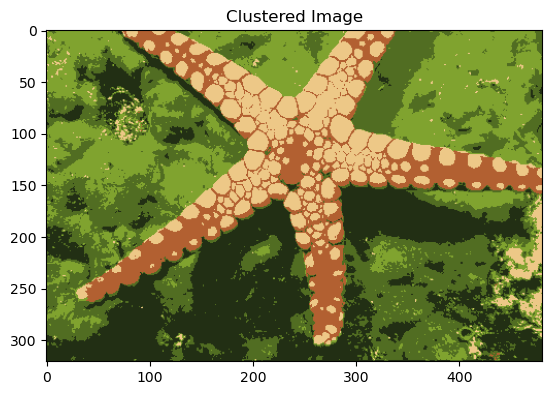

array([[ 81.51361482, 109.68845039,  34.27255581],
       [ 34.54735736,  47.76202791,  20.73684069],
       [ 81.51361482, 109.68845039,  34.27255581],
       ...,
       [ 34.54735736,  47.76202791,  20.73684069],
       [ 34.54735736,  47.76202791,  20.73684069],
       [ 34.54735736,  47.76202791,  20.73684069]])

In [39]:
data = img.reshape(-1, 3)
k = 5
labels, centers = kmeans(k, data)
clustered_img = centers[labels].reshape(img.shape).astype(np.uint8)
plt.title('Clustered Image')
plt.imshow(clustered_img)
plt.show()

## pixelwise Kmeans

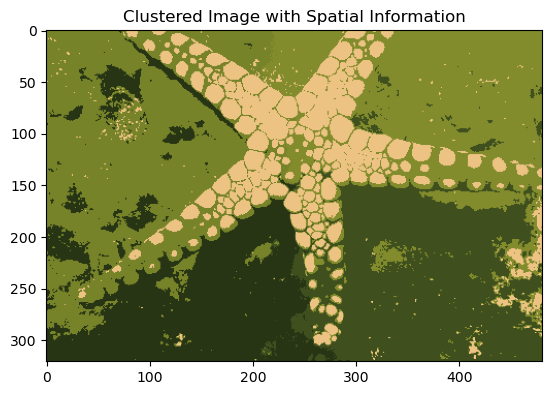

In [13]:
x, y = np.meshgrid(np.arange(img.shape[1]), np.arange(img.shape[0]))
x = x.flatten()
y = y.flatten()
data = img.reshape(-1, 3)
spatial_weight = 0.5
x = (x * spatial_weight).astype(np.float32)
y = (y * spatial_weight).astype(np.float32)
data = np.concatenate([data, x[:, None], y[:, None]], axis=-1)
k = 5
labels, centers = kmeans(k, data)
clustered_img = centers[labels, :3].reshape(img.shape).astype(np.uint8)
plt.title('Clustered Image with Spatial Information')
plt.imshow(clustered_img)
plt.show()